# UnitedStates_COVID_19

Here Our Target Variable is Province _State and on which we are trying to get all data analysis.

In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [210]:
df_coro=pd.read_csv("usacorona_dataset.csv")
df_coro

Province_State Country_Region          Last_Update      Lat  \
0                    Alabama             US  2020-05-21 02:32:54  32.3182   
1                     Alaska             US  2020-05-21 02:32:54  61.3707   
2             American Samoa             US  2020-05-21 02:32:54 -14.2710   
3                    Arizona             US  2020-05-21 02:32:54  33.7298   
4                   Arkansas             US  2020-05-21 02:32:54  34.9697   
5                 California             US  2020-05-21 02:32:54  36.1162   
6                   Colorado             US  2020-05-21 02:32:54  39.0598   
7                Connecticut             US  2020-05-21 02:32:54  41.5978   
8                   Delaware             US  2020-05-21 02:32:54  39.3185   
9           Diamond Princess             US  2020-05-21 02:32:54      NaN   
10      District of Columbia             US  2020-05-21 02:32:54  38.8974   
11                   Florida             US  2020-05-21 02:32:54  27.7663   
12                   Georgia             US  2020-05-21 02:32:54  33.0406   
13            Grand Princess             US  2020-05-21 02:32:54      NaN   
14                      Guam             US  2020-05-21 02:32:54  13.4443   
15                    Hawaii             US  2020-05-21 02:32:54  21.0943   
16                     Idaho             US  2020-05-21 02:32:54  44.2405   
17                  Illinois             US  2020-05-21 02:32:54  40.3495   
18                   Indiana             US  2020-05-21 02:32:54  39.8494   
19                      Iowa             US  2020-05-21 02:32:54  42.0115   
20                    Kansas             US  2020-05-21 02:32:54  38.5266   
21                  Kentucky             US  2020-05-21 02:32:54  37.6681   
22                 Louisiana             US  2020-05-21 02:32:54  31.1695   
23                     Maine             US  2020-05-21 02:32:54  44.6939   
24                  Maryland             US  2020-05-21 02:32:54  39.0639   
25             Massachusetts             US  2020-05-21 02:32:54  42.2302   
26                  Michigan             US  2020-05-21 02:32:54  43.3266   
27                 Minnesota             US  2020-05-21 02:32:54  45.6945   
28               Mississippi             US  2020-05-21 02:32:54  32.7416   
29                  Missouri             US  2020-05-21 02:32:54  38.4561   
30                   Montana             US  2020-05-21 02:32:54  46.9219   
31                  Nebraska             US  2020-05-21 02:32:54  41.1254   
32                    Nevada             US  2020-05-21 02:32:54  38.3135   
33             New Hampshire             US  2020-05-21 02:32:54  43.4525   
34                New Jersey             US  2020-05-21 02:32:54  40.2989   
35                New Mexico             US  2020-05-21 02:32:54  34.8405   
36                  New York             US  2020-05-21 02:32:54  42.1657   
37            North Carolina             US  2020-05-21 02:32:54  35.6301   
38              North Dakota             US  2020-05-21 02:32:54  47.5289   
39  Northern Mariana Islands             US  2020-05-21 02:32:54  15.0979   
40                      Ohio             US  2020-05-21 02:32:54  40.3888   
41                  Oklahoma             US  2020-05-21 02:32:54  35.5653   
42                    Oregon             US  2020-05-21 02:32:54  44.5720   
43              Pennsylvania             US  2020-05-21 02:32:54  40.5908   
44               Puerto Rico             US  2020-05-21 02:32:54  18.2208   
45              Rhode Island             US  2020-05-21 02:32:54  41.6809   
46            South Carolina             US  2020-05-21 02:32:54  33.8569   
47              South Dakota             US  2020-05-21 02:32:54  44.2998   
48                 Tennessee             US  2020-05-21 02:32:54  35.7478   
49                     Texas             US  2020-05-21 02:32:54  31.0545   
50                      Utah             US  2020-05-21 02:32:54  40.1500   
51        

In [211]:
df_coro.shape


(58, 18)

In [212]:
df=df_coro.drop(['Country_Region','ISO3','FIPS','UID','Last_Update'],axis=1)

In [213]:
df

Province_State      Lat     Long_  Confirmed  Deaths  Recovered  \
0                    Alabama  32.3182  -86.9023      13052     522        NaN   
1                     Alaska  61.3707 -152.4044        401      10      352.0   
2             American Samoa -14.2710 -170.1320          0       0        NaN   
3                    Arizona  33.7298 -111.4312      14906     747     3773.0   
4                   Arkansas  34.9697  -92.3731       5003     107     3852.0   
5                 California  36.1162 -119.6816      85997    3497        NaN   
6                   Colorado  39.0598 -105.3111      22797    1299     3478.0   
7                Connecticut  41.5978  -72.7554      39017    3529     6264.0   
8                   Delaware  39.3185  -75.5071       8194     310     3965.0   
9           Diamond Princess      NaN       NaN         49       0        NaN   
10      District of Columbia  38.8974  -77.0268       7551     407     1059.0   
11                   Florida  27.7663  -81.6868      47471    2096        NaN   
12                   Georgia  33.0406  -83.6431      39801    1697        NaN   
13            Grand Princess      NaN       NaN        103       3        NaN   
14                      Guam  13.4443  144.7937        154       5      125.0   
15                    Hawaii  21.0943 -157.4983        643      17      578.0   
16                     Idaho  44.2405 -114.4788       2506      77     1668.0   
17                  Illinois  40.3495  -88.9861     100418    4525        NaN   
18                   Indiana  39.8494  -86.2583      29274    1864        NaN   
19                      Iowa  42.0115  -93.2105      15620     393     8362.0   
20                    Kansas  38.5266  -96.7265       8507     202      473.0   
21                  Kentucky  37.6681  -84.6701       8167     376     2826.0   
22                 Louisiana  31.1695  -91.8678      35316    2608    26249.0   
23                     Maine  44.6939  -69.3819       1819      73     1100.0   
24                  Maryland  39.0639  -76.8021      42323    2123     2993.0   
25             Massachusetts  42.2302  -71.5301      88970    6066        NaN   
26                  Michigan  43.3266  -84.5361      53009    5060    28234.0   
27                 Minnesota  45.6945  -93.9002      17670     786    12227.0   
28               Mississippi  32.7416  -89.6787      11967     570     7681.0   
29                  Missouri  38.4561  -92.2884      11528     640        NaN   
30                   Montana  46.9219 -110.4544        478      16      440.0   
31                  Nebraska  41.1254  -98.2681      11122     138        NaN   
32                    Nevada  38.3135 -117.0554       7388     377      336.0   
33             New Hampshire  43.4525  -71.5639       3868     190     1275.0   
34                New Jersey  40.2989  -74.5210     150776   10749    23945.0   
35                New Mexico  34.8405 -106.2485       6317     283     1882.0   
36                  New York  42.1657  -74.9481     354370   28636    61886.0   
37            North Carolina  35.6301  -79.8064      20262     726    11637.0   
38              North Dakota  47.5289  -99.7840       2095      49     1302.0   
39  Northern Mariana Islands  15.0979  145.6739         21       2       13.0   
40                      Ohio  40.3888  -82.7649      29436    1781        NaN   
41                  Oklahoma  35.5653  -96.9289       5532     299     4266.0   
42                    Oregon  44.5720 -122.0709       3801     144     1406.0   
43              Pennsylvania  40.5908  -77.2098      68126    4770        NaN   
44               Puerto Rico  18.2208  -66.5901       2866     125        NaN   
45              Rhode Island  41.6809  -71.5118      13356     538     1030.0   
46            South Carolina  33.8569  -80.9450       9175     407     5451.0   
47              South Dakota  44.2998  -99.4388       4177      46     3023.0   
48                 Tennessee  35.7478  -86.69

In [214]:
df.shape

(58, 13)

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Lat                   56 non-null     float64
 2   Long_                 56 non-null     float64
 3   Confirmed             58 non-null     int64  
 4   Deaths                58 non-null     int64  
 5   Recovered             42 non-null     float64
 6   Active                58 non-null     float64
 7   Incident_Rate         56 non-null     float64
 8   People_Tested         56 non-null     float64
 9   People_Hospitalized   33 non-null     float64
 10  Mortality_Rate        57 non-null     float64
 11  Testing_Rate          56 non-null     float64
 12  Hospitalization_Rate  33 non-null     float64
dtypes: float64(10), int64(2), object(1)
memory usage: 6.0+ KB


In [216]:
df.isnull().values.any()

True

In [217]:
df.isnull().sum()

Province_State           0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

The Data Set has Null Values.

In [218]:
df.describe()

Lat       Long_      Confirmed        Deaths     Recovered  \
count  56.000000   56.000000      58.000000     58.000000     42.000000   
mean   36.840089  -85.206614   26756.086207   1611.017241   7007.428571   
std    10.887035   49.754449   52562.031122   4084.750891  11674.490020   
min   -14.271000 -170.132000       0.000000      0.000000     13.000000   
25%    34.594600 -101.165775    2596.000000     74.000000    970.000000   
50%    39.061850  -87.944200   10148.500000    385.000000   3008.000000   
75%    42.361650  -76.970625   29395.500000   1394.250000   7326.750000   
max    61.370700  145.673900  354370.000000  28636.000000  61886.000000   

              Active  Incident_Rate  People_Tested  People_Hospitalized  \
count      58.000000      56.000000   5.600000e+01            33.000000   
mean    20070.724138     396.230806   2.258534e+05          4897.454545   
std     41294.705318     402.682539   2.987834e+05         13185.628145   
min         0.000000       0.000000   1.240000e+02            65.000000   
25%       812.500000     148.521021   4.608100e+04           535.000000   
50%      5644.500000     250.477287   1.386545e+05          1493.000000   
75%     19291.250000     477.888542   2.796948e+05          4389.000000   
max    263848.000000    1821.620216   1.505836e+06         76410.000000   

       Mortality_Rate  Testing_Rate  Hospitalization_Rate  
count       57.000000     56.000000             33.000000  
mean         4.458248   3894.186870             14.342541  
std          2.135002   1933.169297              5.047403  
min          0.000000     97.702058              6.778043  
25%          3.072626   2712.800274             10.000000  
50%          4.403318   3469.782532             13.598326  
75%          5.466238   4763.649736             17.658649  
max          9.545549  11377.424693             28.054438

In [219]:
df.isnull().sum()

Province_State           0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

In [220]:
df['Lat'].fillna(df['Lat'].mean(),inplace=True)
df['Long_'].fillna(df['Long_'].mean(),inplace=True)
df['Recovered'].fillna(df['Recovered'].mean(),inplace=True)
df['People_Tested'].fillna(df['People_Tested'].mean(),inplace=True)
df['People_Hospitalized'].fillna(df['People_Hospitalized'].mean(),inplace=True)
df['Hospitalization_Rate'].fillna(df['Hospitalization_Rate'].mean(),inplace=True)
df['Incident_Rate'].fillna(df['Incident_Rate'].mean(),inplace=True)
df['Testing_Rate'].fillna(df['Testing_Rate'].mean(),inplace=True)
df['Mortality_Rate'].fillna(df['Mortality_Rate'].mean(),inplace=True)

In [221]:
df.isnull().sum()

Province_State          0
Lat                     0
Long_                   0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

In [222]:
df.describe()

Lat       Long_      Confirmed        Deaths     Recovered  \
count  58.000000   58.000000      58.000000     58.000000     58.000000   
mean   36.840089  -85.206614   26756.086207   1611.017241   7007.428571   
std    10.694329   48.873770   52562.031122   4084.750891   9901.304545   
min   -14.271000 -170.132000       0.000000      0.000000     13.000000   
25%    34.872800  -99.697700    2596.000000     74.000000   1281.750000   
50%    38.978600  -86.797300   10148.500000    385.000000   4987.000000   
75%    42.214075  -77.072550   29395.500000   1394.250000   7007.428571   
max    61.370700  145.673900  354370.000000  28636.000000  61886.000000   

              Active  Incident_Rate  People_Tested  People_Hospitalized  \
count      58.000000      58.000000   5.800000e+01            58.000000   
mean    20070.724138     396.230806   2.258534e+05          4897.454545   
std     41294.705318     395.554852   2.934948e+05          9879.577790   
min         0.000000       0.000000   1.240000e+02            65.000000   
25%       812.500000     154.909239   4.745000e+04          1454.500000   
50%      5644.500000     259.009335   1.433085e+05          4897.454545   
75%     19291.250000     462.828082   2.646656e+05          4897.454545   
max    263848.000000    1821.620216   1.505836e+06         76410.000000   

       Mortality_Rate  Testing_Rate  Hospitalization_Rate  
count       58.000000     58.000000             58.000000  
mean         4.458248   3894.186870             14.342541  
std          2.116191   1898.951207              3.781861  
min          0.000000     97.702058              6.778043  
25%          3.116158   2741.843521             12.829963  
50%          4.409323   3501.526835             14.342541  
75%          5.450908   4622.586404             15.552021  
max          9.545549  11377.424693             28.054438

Observations:-
1) Now count is Same so no null values in the data set.
2) Min Death Count is 0 and maximum is 28636 and vice versa we can check for Recovered cases.
3) There might be presence of outliers as the difference between maximmum and min is more also the std is more than mean in many columns.

In [223]:
coro_df=df.corr()
coro_df

Lat     Long_  Confirmed    Deaths  Recovered  \
Lat                   1.000000 -0.278274   0.120391  0.119685   0.030196   
Long_                -0.278274  1.000000   0.009951  0.028690  -0.041588   
Confirmed             0.120391  0.009951   1.000000  0.982191   0.822547   
Deaths                0.119685  0.028690   0.982191  1.000000   0.830223   
Recovered             0.030196 -0.041588   0.822547  0.830223   1.000000   
Active                0.119635  0.011604   0.985218  0.954378   0.725085   
Incident_Rate         0.245693  0.041318   0.708436  0.710105   0.542795   
People_Tested         0.084769 -0.077781   0.824136  0.739634   0.711255   
People_Hospitalized   0.026456  0.079677   0.869267  0.908279   0.761829   
Mortality_Rate       -0.134906  0.297192   0.382537  0.427127   0.322160   
Testing_Rate          0.309579  0.190191   0.332464  0.344465   0.220597   
Hospitalization_Rate -0.066255  0.071381   0.287471  0.298225   0.231692   

                        Active  Incident_Rate  People_Tested  \
Lat                   0.119635       0.245693       0.084769   
Long_                 0.011604       0.041318      -0.077781   
Confirmed             0.985218       0.708436       0.824136   
Deaths                0.954378       0.710105       0.739634   
Recovered             0.725085       0.542795       0.711255   
Active                1.000000       0.700926       0.826144   
Incident_Rate         0.700926       1.000000       0.441669   
People_Tested         0.826144       0.441669       1.000000   
People_Hospitalized   0.835938       0.551076       0.642091   
Mortality_Rate        0.367626       0.353882       0.220200   
Testing_Rate          0.321395       0.620621       0.230753   
Hospitalization_Rate  0.284564       0.196029       0.252680   

                      People_Hospitalized  Mortality_Rate  Testing_Rate  \
Lat                              0.026456       -0.134906      0.309579   
Long_                            0.079677        0.297192      0.190191   
Confirmed                        0.869267        0.382537      0.332464   
Deaths                           0.908279        0.427127      0.344465   
Recovered                        0.761829        0.322160      0.220597   
Active                           0.835938        0.367626      0.321395   
Incident_Rate                    0.551076        0.353882      0.620621   
People_Tested                    0.642091        0.220200      0.230753   
People_Hospitalized              1.000000        0.334335      0.270255   
Mortality_Rate                   0.334335        1.000000      0.158970   
Testing_Rate                     0.270255        0.158970      1.000000   
Hospitalization_Rate             0.377586        0.451218     -0.058463   

                      Hospitalization_Rate  
Lat                              -0.066255  
Long_                             0.071381  
Confirmed                         0.287471  
Deaths                            0.298225  
Recovered                         0.231692  
Active                            0.284564  
Incident_Rate                     0.196029  
People_Tested                     0.252680  
People_Hospitalized               0.377586  
Mortality_Rate                    0.451218  
Testing_Rate                     -0.058463  
Hospitalization_Rate              1.000000

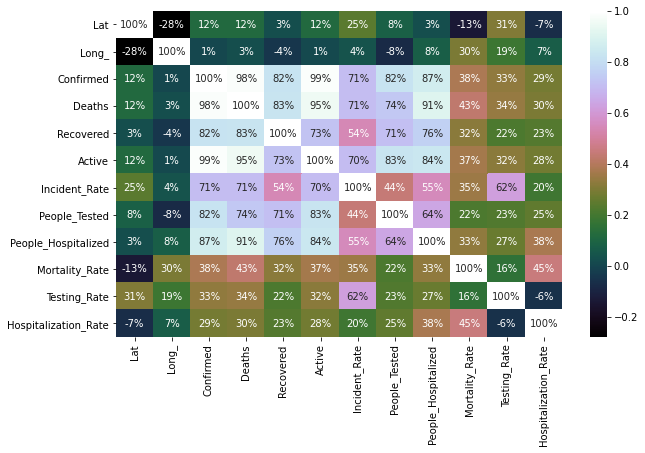

In [224]:
plt.figure(figsize=(10,6))
sns.heatmap(coro_df,annot=True,fmt=".0%",cmap='cubehelix')
plt.show()

There is negative co relation between Lat and Long ,Testing Rate,Mortality Rate


# Univariable Analysis

In [225]:
plt.subplots(figsize=(290,90))
plt.tight_layout()
sns.barplot(x="Confirmed",y="Province_State",data=df)
plt.title("Confirmed Death Counts")
plt.xlabel("Confirmed")
plt.ylabel("count")
plt.show()

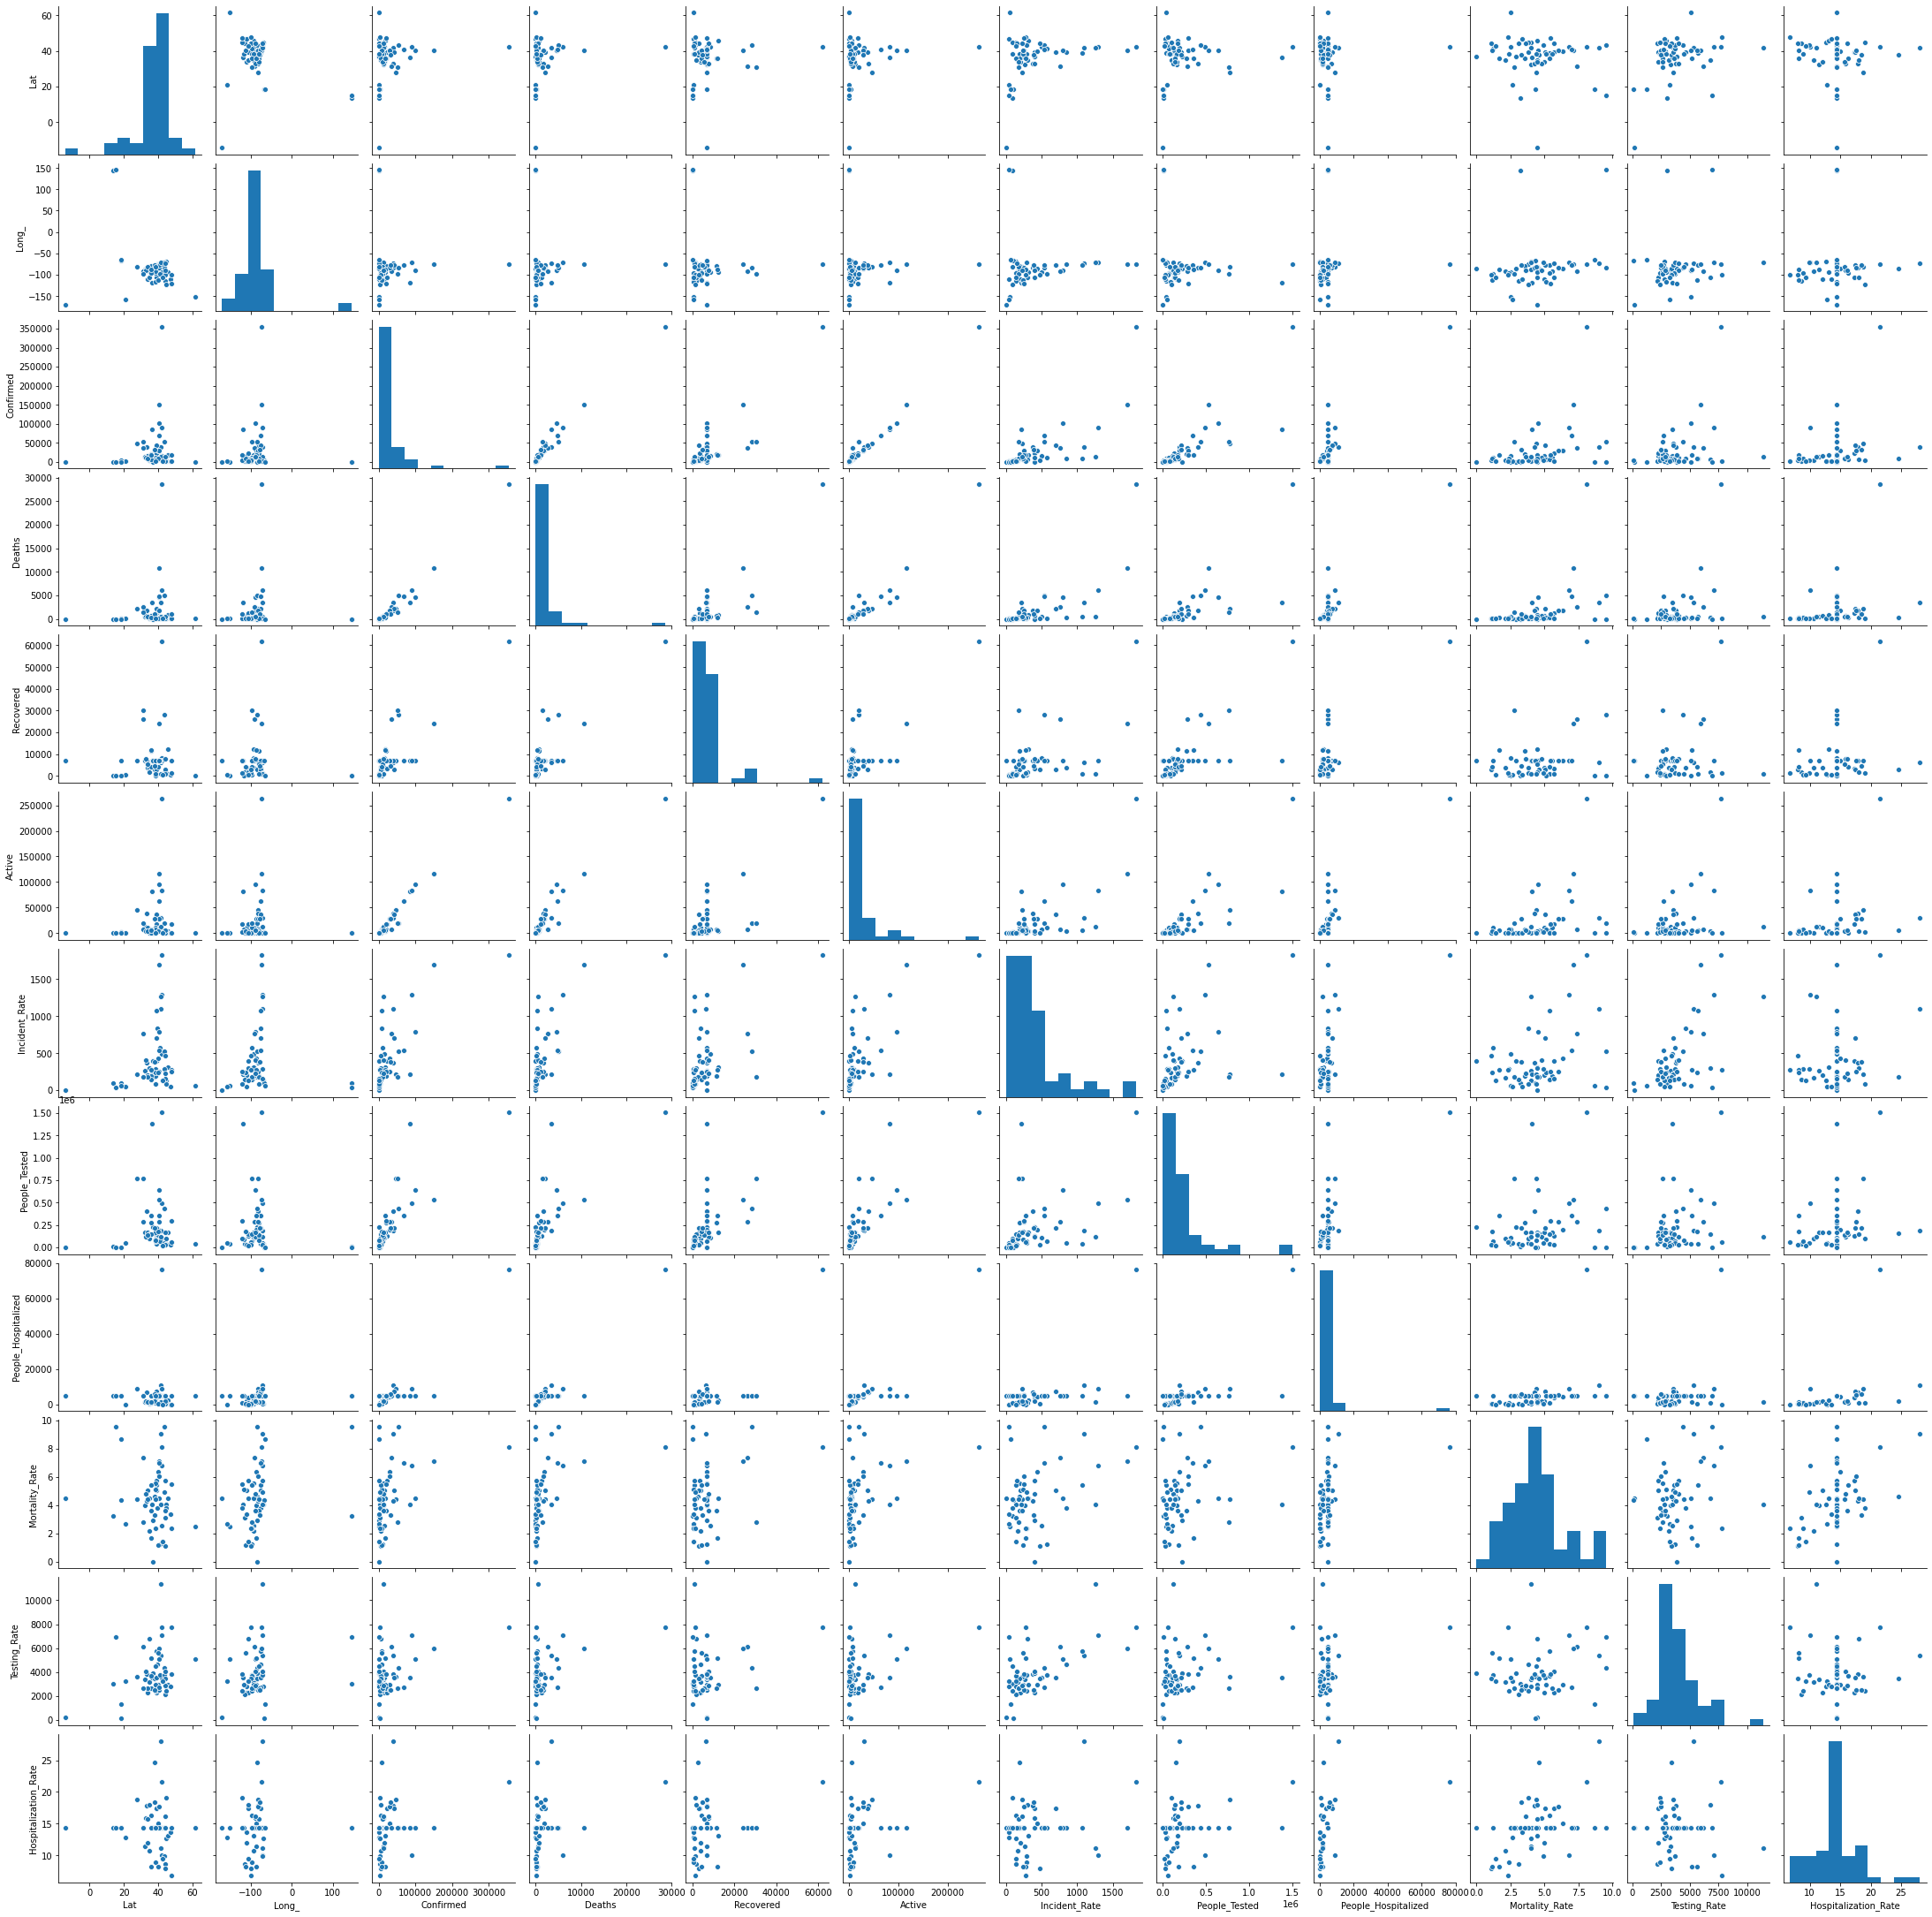

In [226]:
sns.pairplot(data=df)

In [227]:
df.keys()

Index(['Province_State', 'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered',
       'Active', 'Incident_Rate', 'People_Tested', 'People_Hospitalized',
       'Mortality_Rate', 'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.,
        350000., 400000.]),
 <a list of 9 Text major ticklabel objects>)

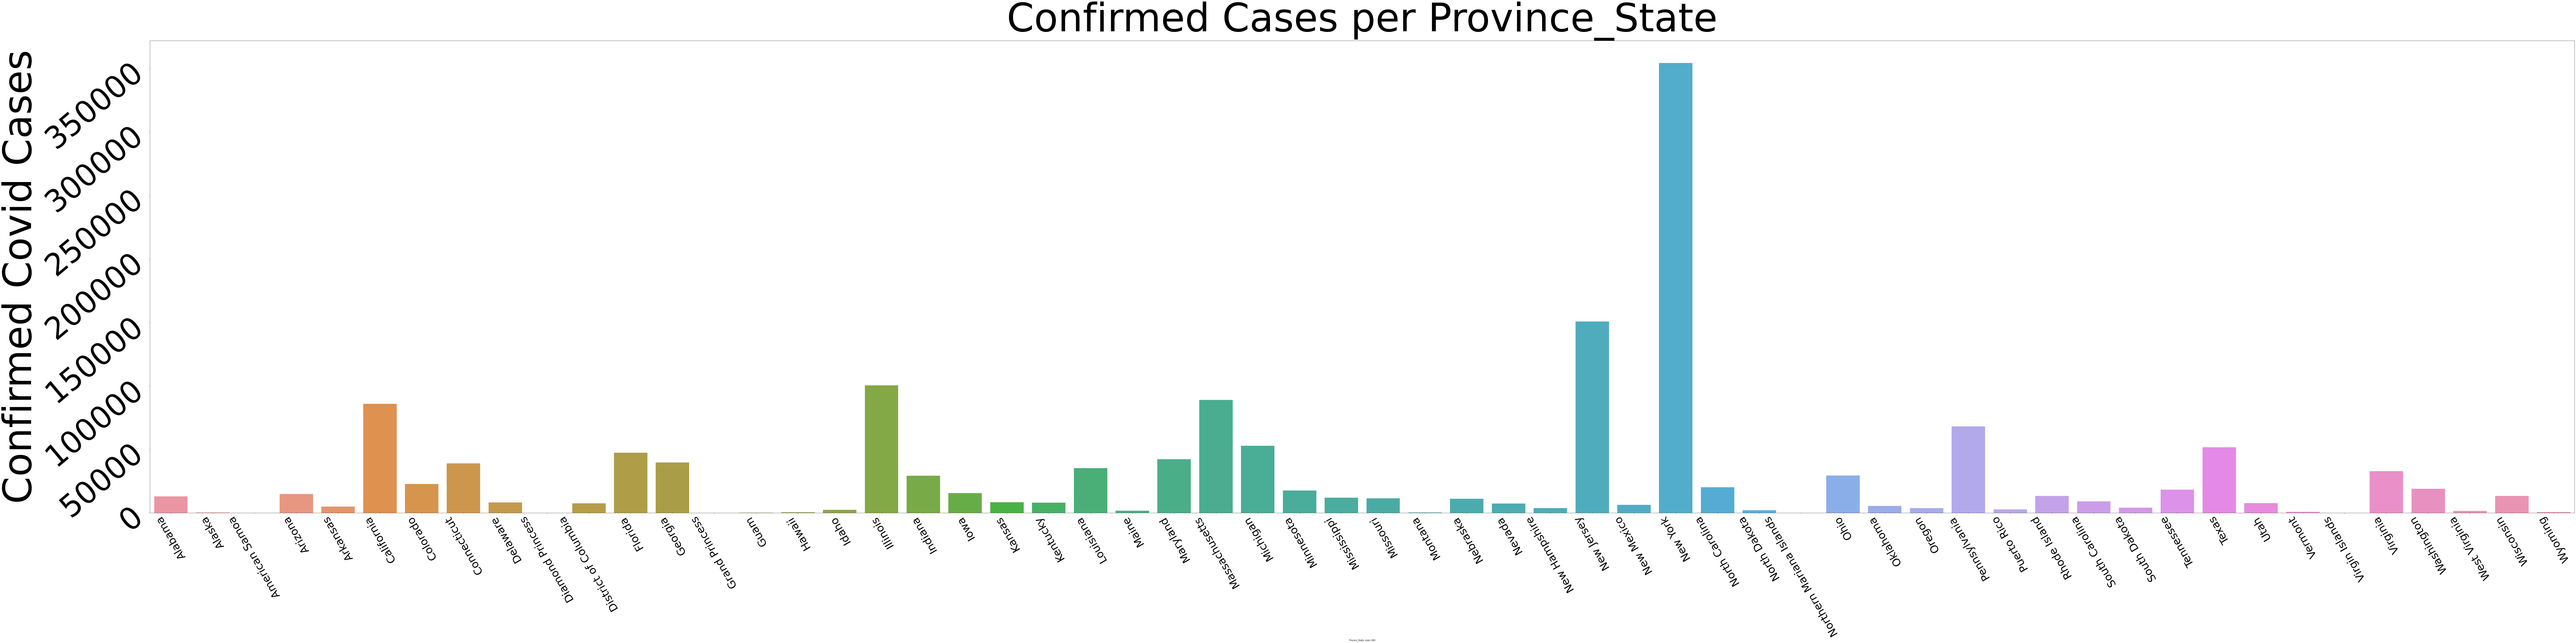

In [228]:
plt.figure(figsize=(200,40))
sns.barplot(y="Confirmed",x="Province_State",data=df)
plt.ylabel('Confirmed Covid Cases', size=180)
plt.xlabel('Provice_State, size=180')
plt.title('Confirmed Cases per Province_State', size=180)
plt.xticks(size=50,rotation = 120)
plt.yticks(size=140, rotation=40)

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.]),
 <a list of 8 Text major ticklabel objects>)

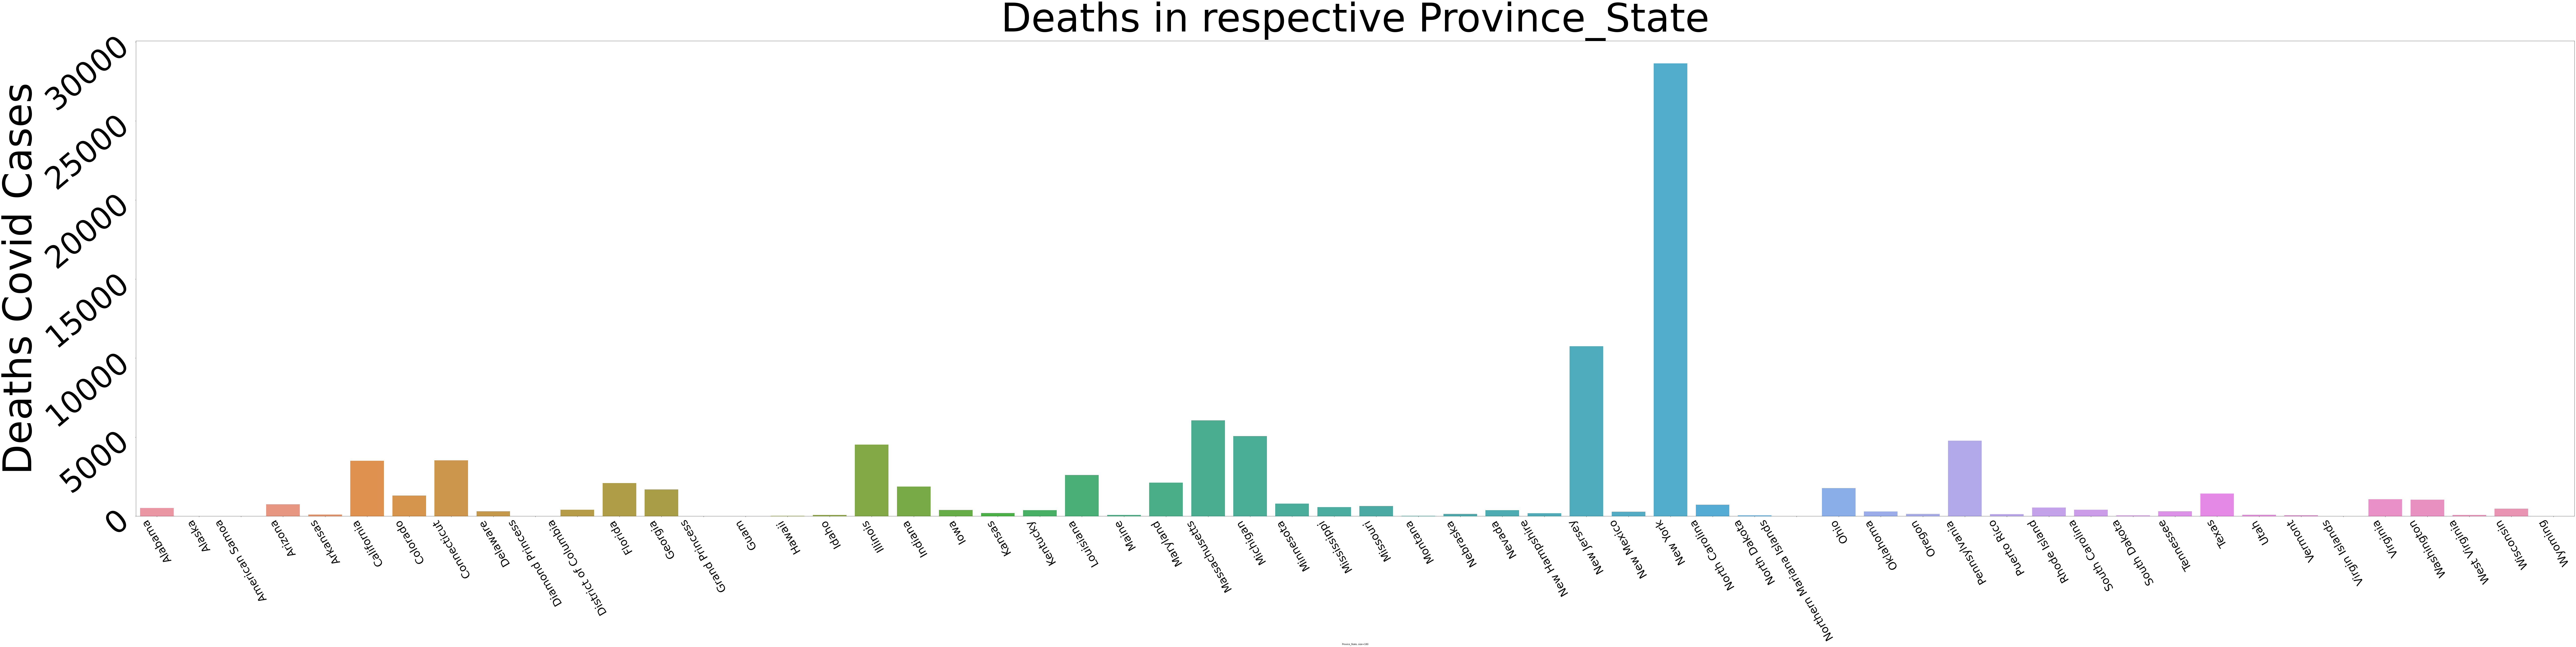

In [229]:
plt.figure(figsize=(200,40))
sns.barplot(y="Deaths",x="Province_State",data=df)
plt.ylabel('Deaths Covid Cases', size=180)
plt.xlabel('Provice_State, size=180')
plt.title('Deaths in respective Province_State', size=180)
plt.xticks(size=50,rotation = 120)
plt.yticks(size=140, rotation=40)

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.]),
 <a list of 8 Text major ticklabel objects>)

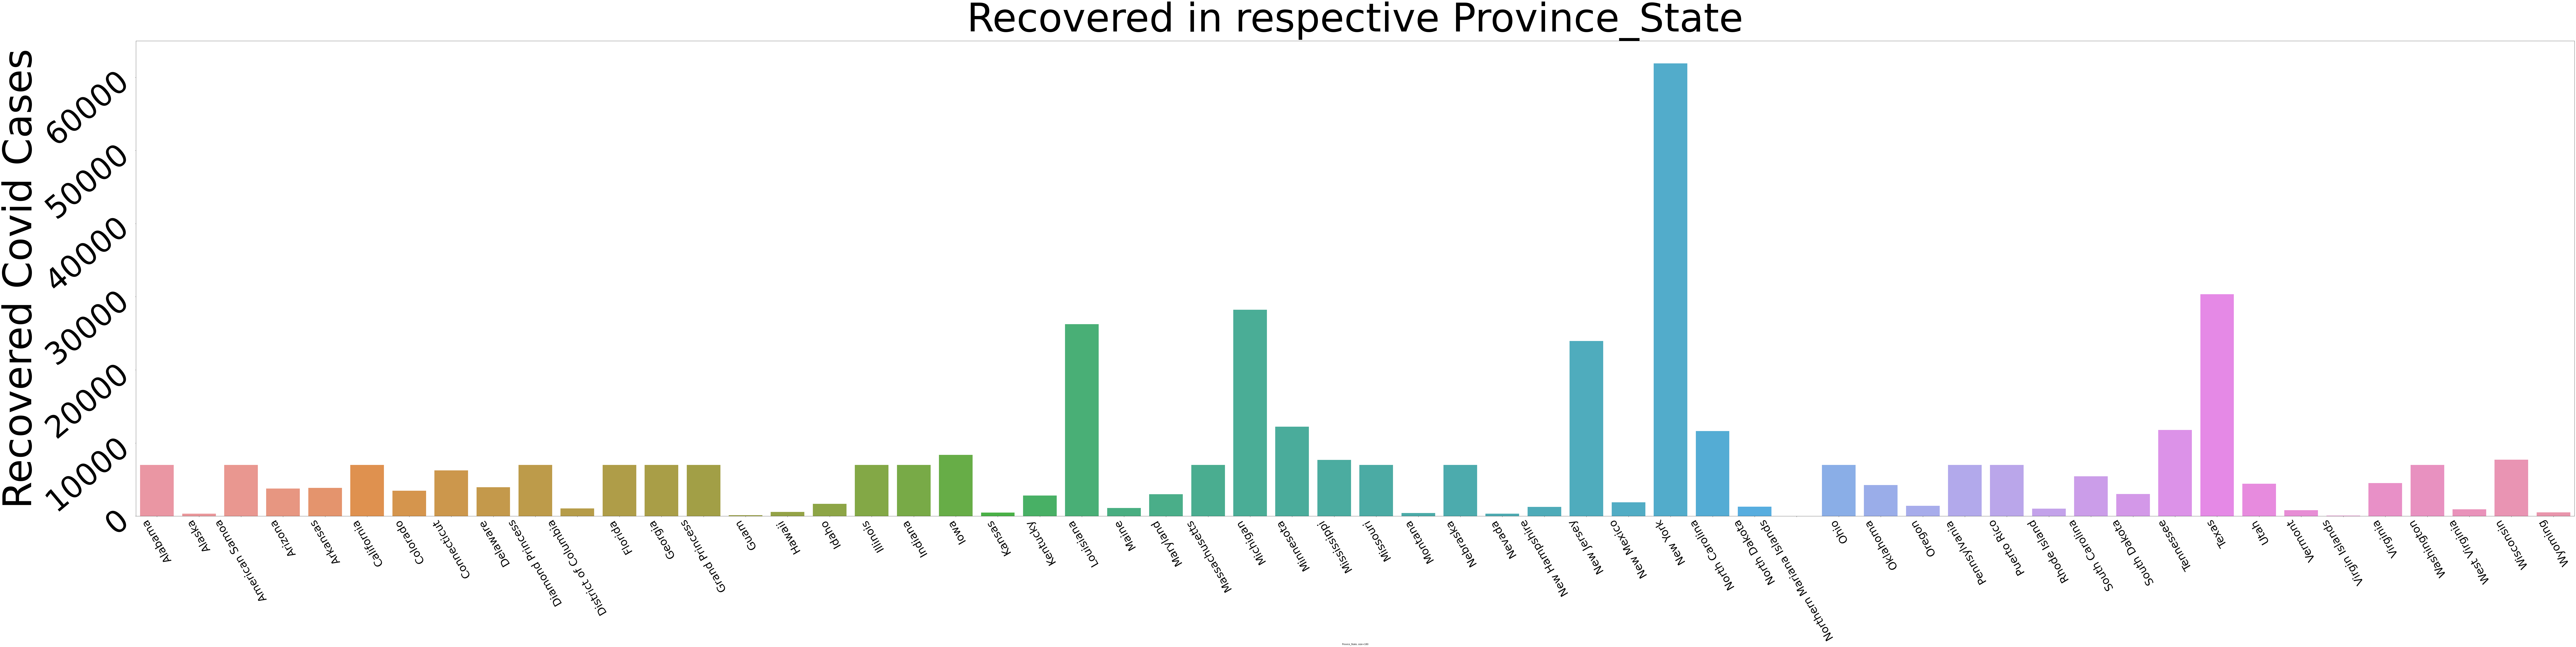

In [230]:
plt.figure(figsize=(200,40))
sns.barplot(y="Recovered",x="Province_State",data=df)
plt.ylabel('Recovered Covid Cases', size=180)
plt.xlabel('Provice_State, size=180')
plt.title('Recovered in respective Province_State', size=180)
plt.xticks(size=50,rotation = 120)
plt.yticks(size=140, rotation=40)

In [231]:
df.skew()

Lat                    -2.250097
Long_                   3.567919
Confirmed               4.708614
Deaths                  5.489201
Recovered               3.647693
Active                  4.180953
Incident_Rate           1.988351
People_Tested           2.829700
People_Hospitalized     6.869437
Mortality_Rate          0.496115
Testing_Rate            1.313407
Hospitalization_Rate    0.867341
dtype: float64

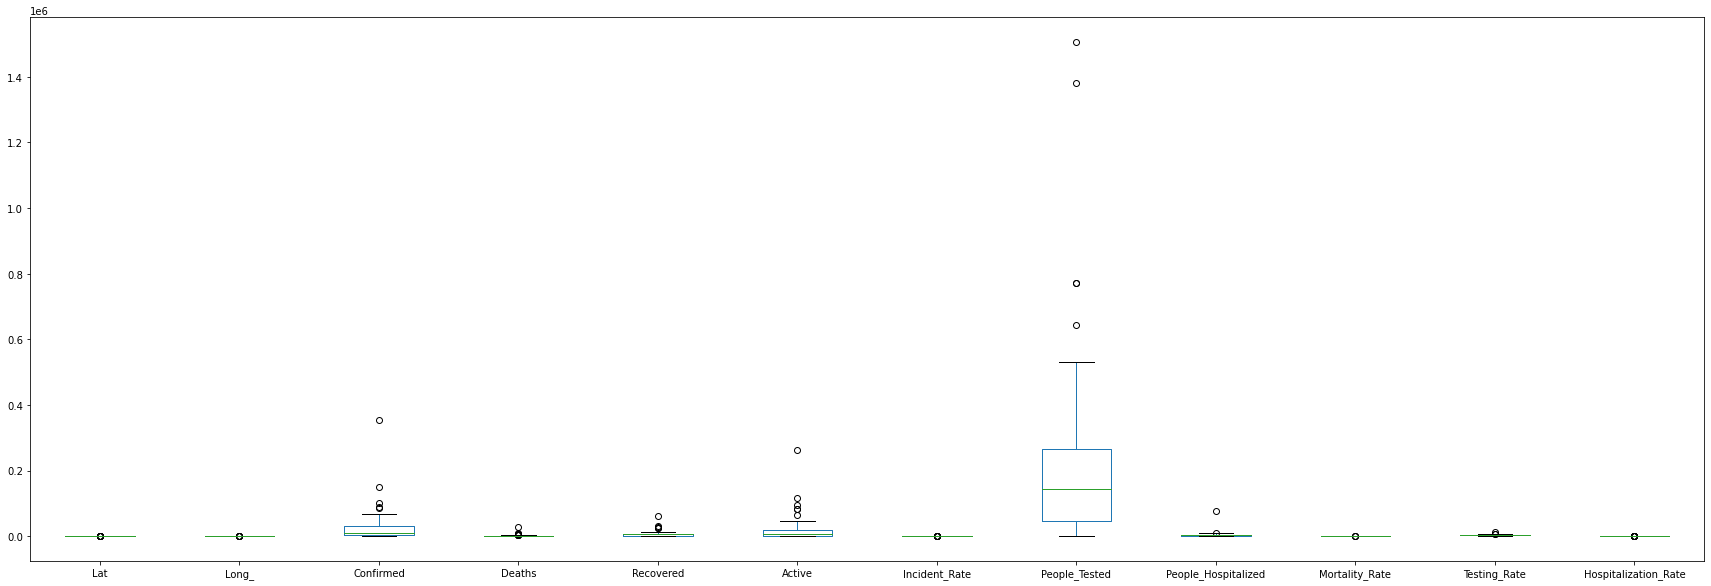

In [232]:

df.plot.box(figsize=(30,10))

Here we can get the outliers  in the Database so we need to deal with this using z score

In [235]:
le=LabelEncoder()
df['Province_State']=le.fit_transform(df['Province_State'])
df['Province_State']

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
20    20
21    21
22    22
23    23
24    24
25    25
26    26
27    27
28    28
29    29
30    30
31    31
32    32
33    33
34    34
35    35
36    36
37    37
38    38
39    39
40    40
41    41
42    42
43    43
44    44
45    45
46    46
47    47
48    48
49    49
50    50
51    51
52    52
53    53
54    54
55    55
56    56
57    57
Name: Province_State, dtype: int32

In [236]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 2,  5,  7, 14, 34, 36, 36, 36, 36, 36, 36, 36, 39, 45],
       dtype=int64),
 array([ 1,  8, 12,  2,  7,  3,  4,  5,  6,  7,  8,  9,  2, 11],
       dtype=int64))

In [237]:
df_new=df[(z<3).all(axis=1)]
df_new

Province_State        Lat       Long_  Confirmed  Deaths     Recovered  \
0                0  32.318200  -86.902300      13052     522   7007.428571   
1                1  61.370700 -152.404400        401      10    352.000000   
3                3  33.729800 -111.431200      14906     747   3773.000000   
4                4  34.969700  -92.373100       5003     107   3852.000000   
6                6  39.059800 -105.311100      22797    1299   3478.000000   
8                8  39.318500  -75.507100       8194     310   3965.000000   
9                9  36.840089  -85.206614         49       0   7007.428571   
10              10  38.897400  -77.026800       7551     407   1059.000000   
11              11  27.766300  -81.686800      47471    2096   7007.428571   
12              12  33.040600  -83.643100      39801    1697   7007.428571   
13              13  36.840089  -85.206614        103       3   7007.428571   
15              15  21.094300 -157.498300        643      17    578.000000   
16              16  44.240500 -114.478800       2506      77   1668.000000   
17              17  40.349500  -88.986100     100418    4525   7007.428571   
18              18  39.849400  -86.258300      29274    1864   7007.428571   
19              19  42.011500  -93.210500      15620     393   8362.000000   
20              20  38.526600  -96.726500       8507     202    473.000000   
21              21  37.668100  -84.670100       8167     376   2826.000000   
22              22  31.169500  -91.867800      35316    2608  26249.000000   
23              23  44.693900  -69.381900       1819      73   1100.000000   
24              24  39.063900  -76.802100      42323    2123   2993.000000   
25              25  42.230200  -71.530100      88970    6066   7007.428571   
26              26  43.326600  -84.536100      53009    5060  28234.000000   
27              27  45.694500  -93.900200      17670     786  12227.000000   
28              28  32.741600  -89.678700      11967     570   7681.000000   
29              29  38.456100  -92.288400      11528     640   7007.428571   
30              30  46.921900 -110.454400        478      16    440.000000   
31              31  41.125400  -98.268100      11122     138   7007.428571   
32              32  38.313500 -117.055400       7388     377    336.000000   
33              33  43.452500  -71.563900       3868     190   1275.000000   
35              35  34.840500 -106.248500       6317     283   1882.000000   
37              37  35.630100  -79.806400      20262     726  11637.000000   
38              38  47.528900  -99.784000       2095      49   1302.000000   
40              40  40.388800  -82.764900      29436    1781   7007.428571   
41              41  35.565300  -96.928900       5532     299   4266.000000   
42              42  44.572000 -122.070900       3801     144   1406.000000   
43              43  40.590800  -77.209800      68126    4770   7007.428571   
44              44  18.220800  -66.590100       2866     125   7007.428571   
46              46  33.856900  -80.945000       9175     407   5451.000000   
47              47  44.299800  -99.438800       4177      46   3023.000000   
48              48  35.747800  -86.692300      18412     305  11783.000000   
49              49  31.054500  -97.563500      51673    1426  30341.000000   
50              50  40.150000 -111.862400       7710      90   4423.000000   
51              51  44.045900  -72.710700        944      54    824.000000   
52              52  18.335800  -64.896300         69       6     61.000000   
53              53  37.769300  -78.170000      32908    1075   4523.000000   
54              54  47.400900 -121.490500      18971    1037   7007.428571   
55              55  38.491200  -80.954500       1567      69    950.000000   
56              56  44.268500  -89.616500      13413     481   7728.000000   
57              57  42.756000 -107.302500        787      11    528.000000   

     Active  Incident_Rat

In [238]:
df_new.shape

(50, 13)

In [239]:
df.shape

(58, 13)

In [240]:
y=df['Province_State']
y

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
20    20
21    21
22    22
23    23
24    24
25    25
26    26
27    27
28    28
29    29
30    30
31    31
32    32
33    33
34    34
35    35
36    36
37    37
38    38
39    39
40    40
41    41
42    42
43    43
44    44
45    45
46    46
47    47
48    48
49    49
50    50
51    51
52    52
53    53
54    54
55    55
56    56
57    57
Name: Province_State, dtype: int32

In [241]:
x=df.drop('Province_State', axis=1)
x

Lat       Long_  Confirmed  Deaths     Recovered    Active  \
0   32.318200  -86.902300      13052     522   7007.428571   12530.0   
1   61.370700 -152.404400        401      10    352.000000      39.0   
2  -14.271000 -170.132000          0       0   7007.428571       0.0   
3   33.729800 -111.431200      14906     747   3773.000000   10386.0   
4   34.969700  -92.373100       5003     107   3852.000000    1044.0   
5   36.116200 -119.681600      85997    3497   7007.428571   82500.0   
6   39.059800 -105.311100      22797    1299   3478.000000   18020.0   
7   41.597800  -72.755400      39017    3529   6264.000000   29224.0   
8   39.318500  -75.507100       8194     310   3965.000000    3919.0   
9   36.840089  -85.206614         49       0   7007.428571      49.0   
10  38.897400  -77.026800       7551     407   1059.000000    6085.0   
11  27.766300  -81.686800      47471    2096   7007.428571   45375.0   
12  33.040600  -83.643100      39801    1697   7007.428571   38104.0   
13  36.840089  -85.206614        103       3   7007.428571     100.0   
14  13.444300  144.793700        154       5    125.000000      24.0   
15  21.094300 -157.498300        643      17    578.000000      48.0   
16  44.240500 -114.478800       2506      77   1668.000000     761.0   
17  40.349500  -88.986100     100418    4525   7007.428571   95893.0   
18  39.849400  -86.258300      29274    1864   7007.428571   27410.0   
19  42.011500  -93.210500      15620     393   8362.000000    6865.0   
20  38.526600  -96.726500       8507     202    473.000000    7832.0   
21  37.668100  -84.670100       8167     376   2826.000000    4965.0   
22  31.169500  -91.867800      35316    2608  26249.000000    6459.0   
23  44.693900  -69.381900       1819      73   1100.000000     646.0   
24  39.063900  -76.802100      42323    2123   2993.000000   37207.0   
25  42.230200  -71.530100      88970    6066   7007.428571   82904.0   
26  43.326600  -84.536100      53009    5060  28234.000000   19715.0   
27  45.694500  -93.900200      17670     786  12227.000000    4657.0   
28  32.741600  -89.678700      11967     570   7681.000000    3716.0   
29  38.456100  -92.288400      11528     640   7007.428571   10888.0   
30  46.921900 -110.454400        478      16    440.000000      22.0   
31  41.125400  -98.268100      11122     138   7007.428571   10984.0   
32  38.313500 -117.055400       7388     377    336.000000    6675.0   
33  43.452500  -71.563900       3868     190   1275.000000    2403.0   
34  40.298900  -74.521000     150776   10749  23945.000000  116082.0   
35  34.840500 -106.248500       6317     283   1882.000000    4152.0   
36  42.165700  -74.948100     354370   28636  61886.000000  263848.0   
37  35.630100  -79.806400      20262     726  11637.000000    7899.0   
38  47.528900  -99.784000       2095      49   1302.000000     744.0   
39  15.097900  145.673900         21       2     13.000000       6.0   
40  40.388800  -82.764900      29436    1781   7007.428571   27655.0   
41  35.565300  -96.928900       5532     299   4266.000000     967.0   
42  44.572000 -122.070900       3801     144   1406.000000    2251.0   
43  40.590800  -77.209800      68126    4770   7007.428571   63356.0   
44  18.220800  -66.590100       2866     125   7007.428571    2741.0   
45  41.680900  -71.511800      13356     538   1030.000000   11788.0   
46  33.856900  -80.945000       9175     407   5451.000000    3317.0   
47  44.299800  -99.438800       4177      46   3023.000000    1108.0   
48  35.747800  -86.692300      18412     305  11783.000000    6324.0   
49  31.054500  -97.563500      51673    1426  30341.000000   19906.0   
50  40.150000 -111.862400       7710      90   4423.000000    3197.0   
51  44.045900  -72.710700        944      54    824.000000      66.0   
52  18.335800  -64.896300         69       6     61.000000       2.0   
53  37.769300  -78.170000      32908    1075   4523.000000   27310.0   
54  47.400900 -121.490500      18971    1037   700

In [242]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [246]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=44, shuffle =True)
   


In [247]:
x_train.shape

(38, 12)

In [248]:
y_train.shape

(38,)

In [249]:
x_test.shape

(20, 12)

In [250]:
y_test.shape

(20,)

In [251]:
lr=LinearRegression()

In [252]:
 lr.fit(x_train,y_train)

LinearRegression()

In [253]:
lr.score(x_train,y_train)

0.2700869253663867

In [256]:
pred_train=lr.predict(x_train)

In [257]:
 pred_test=lr.predict(x_test)

In [258]:
pred_train

array([21.11170672, 30.03222602, 31.72904214, 27.94155459, 31.68254101,
       38.51268453, 28.82098035, 19.17114466, 27.66933994,  7.50385937,
       36.48631947, 14.52725549, 37.21574576, 29.32639993, 31.83303981,
       25.26513138, 50.79163489, 29.01177894, 18.26052483, 34.70655984,
       33.11836582, 32.05981551, 30.72925509, 23.60622955, 43.69831058,
       25.50049164, 24.53599831, 35.45131059, 32.131442  , 40.6797591 ,
       34.12637148, 40.48836259, 16.95590715, 27.79965865, 23.32245632,
       43.74627135, 28.48441342, 31.96611119])

In [259]:
pred_test

array([32.80354056, 25.71762813, 32.15134161, 42.91256596, 39.05785011,
       26.57285626, 38.55288014, 31.20332529, 23.58805534, 38.41575003,
       38.74978848, 30.19991144, 35.04755306, 15.79411552, 33.06169086,
       19.42783691, 31.73617676, 30.02965539, 22.37981842, 30.37836114])

Now we can use lasso and Ridge for Regularization

In [260]:
from sklearn.linear_model import Lasso, Ridge

In [264]:
ls=Lasso(alpha=0.000)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.2700869252810657

Here Lasso Regression is showing less errors so we are saving this reult in the file

In [262]:
import joblib
joblib.dump(ls,"USA_Corona.pkl")

['USA_Corona.pkl']